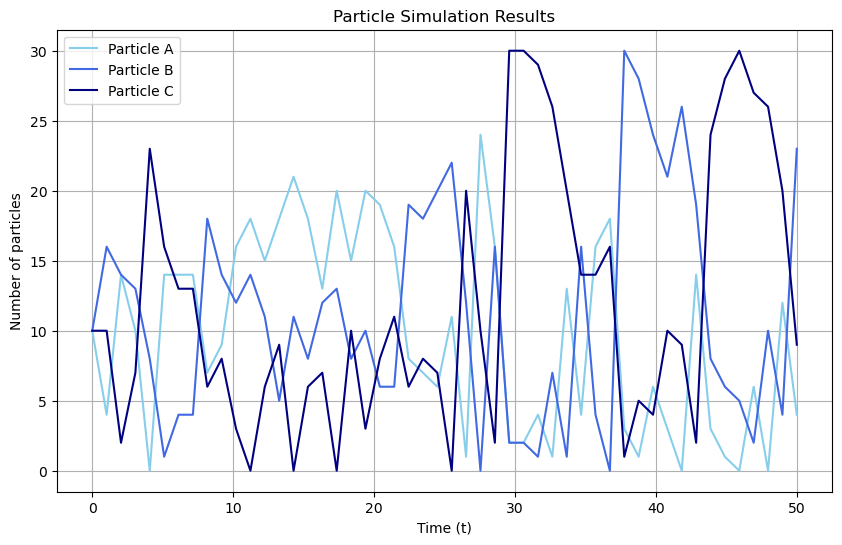

In [135]:
# SIMULATING THE PARTICLE COLLISIONS AND PLOTTING RESULTS

import numpy as np
import matplotlib.pyplot as plt

# define initial conditions
total_particles = 30
initial_counts = {'A': 10, 'B': 10, 'C': 10}
# define simulation parameters
T = 50  # Total time
dt = 1 # Time step
num_steps = int(T / dt)


# initialize lists to store results
time_points = np.linspace(0, T, num_steps)
counts_A = np.zeros(len(time_points))
counts_B = np.zeros(len(time_points))
counts_C = np.zeros(len(time_points))

# initialize counts at t = 0
counts_A[0] = initial_counts['A']
counts_B[0] = initial_counts['B']
counts_C[0] = initial_counts['C']

# simulate particle collisions
for i in range(1, num_steps):
    # calculate change in counts due to collisions, whilst ensuring counts stay positive
    if counts_A[i-1] > 0 and counts_B[i-1] > 0:
        collisions_AB = np.random.randint(0, min(counts_A[i-1], counts_B[i-1]) + 1)
    else:
        collisions_AB = 0
    
    if counts_B[i-1] > 0 and counts_C[i-1] > 0:
        collisions_BC = np.random.randint(0, min(counts_B[i-1], counts_C[i-1]) + 1)
    else:
        collisions_BC = 0
    
    if counts_C[i-1] > 0 and counts_A[i-1] > 0:
        collisions_CA = np.random.randint(0, min(counts_C[i-1], counts_A[i-1]) + 1)
    else:
        collisions_CA = 0
    
    # updating counts after the collisions
    counts_A[i] = max(0, min(total_particles, counts_A[i-1] + 2*collisions_BC - collisions_CA - collisions_AB))  # A + B -> 2C
    counts_B[i] = max(0, min(total_particles, counts_B[i-1] + 2*collisions_CA - collisions_AB - collisions_BC)) # A + C -> 2B
    counts_C[i] = max(0, min(total_particles, counts_C[i-1] + 2*collisions_AB - collisions_BC - collisions_CA))  # B + C -> 2A

# plot results
plt.figure(figsize=(10, 6))
plt.plot(time_points, counts_A, label='Particle A', color='skyblue')
plt.plot(time_points, counts_B, label='Particle B', color='royalblue')
plt.plot(time_points, counts_C, label='Particle C', color='navy')
plt.xlabel('Time (t)')
plt.ylabel('Number of particles')
plt.title('Particle Simulation Results')
plt.legend()
plt.grid(True)
plt.show()


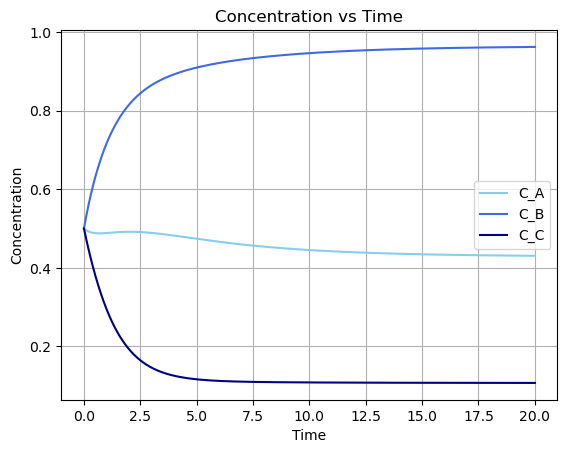

In [138]:
# PLOTTING THE SYSTEM OF DIFFERENTIAL EQUATIONS GIVEN THE DETERMINED INITIAL CONDITIONS

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define the differential equation system
def dCdt(C, t, k_AB, k_BC, k_AC):
    C_A, C_B, C_C = C
    dC_A_dt = -k_AB * C_A * C_B - k_AC * C_A * C_C + 2 * k_BC * C_B * C_C
    dC_B_dt = -k_AB * C_A * C_B - k_BC * C_B * C_C + 2 * k_AC * C_A * C_C
    dC_C_dt = -k_AC * C_A * C_C - k_BC * C_B * C_C + 2 * k_AB * C_A * C_B
    return [dC_A_dt, dC_B_dt, dC_C_dt]

# define the initial conditions
C0 = [0.5, 0.5, 0.5]  # Initial concentrations of A, B, and C
t = np.linspace(0, 20, 1000)  # Time points

# define the rate constants
k_AB = 0.1
k_BC = 0.4
k_AC = 0.9

# solve the differential equations
sol = odeint(dCdt, C0, t, args=(k_AB, k_BC, k_AC))

# plot solutions
plt.plot(t, sol[:, 0], label='C_A', color='skyblue')
plt.plot(t, sol[:, 1], label='C_B', color='royalblue')
plt.plot(t, sol[:, 2], label='C_C', color='navy')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
# CALCULATING THE EIGENVALUES OF MY SYSTEM MATRIX

import sympy as sp

# define lambda as the eigenvlalue variable
lambda_ = sp.symbols('lambda')

# define constants
k_AB = 1  
k_BC = 1  
k_AC = 1  

# define matrix A with variables x, y and z representing the concentrations of A, B and C respectively
A = sp.Matrix([
    [-(k_AB)*y, 2*k_BC*z, -(k_AC)*x],
    [-(k_AB)*y, -k_BC*z, 2*k_AC*x],
    [2*k_AB*y, -k_BC*z, -(k_AC)*x]
])

# characteristic polynomial
characteristic_poly = A.charpoly(lambda_)

# find eigenvalues
eigenvalues = sp.solve(characteristic_poly, lambda_)

print("Eigenvalues (lambda), are:", eigenvalues)


Eigenvalues (lambda), are: [0, -x/2 - y/2 - z/2 - sqrt(x**2 - 10*x*y - 10*x*z + y**2 - 10*y*z + z**2)/2, -x/2 - y/2 - z/2 + sqrt(x**2 - 10*x*y - 10*x*z + y**2 - 10*y*z + z**2)/2]
